<a href="https://colab.research.google.com/github/thoratmansi/ML-Data-Cleaning-and-Feature-Selection/blob/main/ML_Data_Cleaning_and_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing dependencies
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=9f11490fda6885585c24b4d3c55778d1d93ef267d5caa5b5b56e935661253a52
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [3]:
# Reading the ablone dataset
data = pd.read_csv(
    "https://raw.githubusercontent.com/thoratmansi/ML-Data-Cleaning-and-Feature-Selection/main/salary.csv"
)

In [4]:
# Viewing data in the file
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Q1- What are the data types? (Only numeric and categorical)

In [5]:
# 1. Data Types
print("Data Types:")
print(data.dtypes)

Data Types:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object


**Q2- Are there missing?

In [6]:
#2. Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


** Q3- What are the likely distributions of the numeric variables?**

<Figure size 800x500 with 0 Axes>

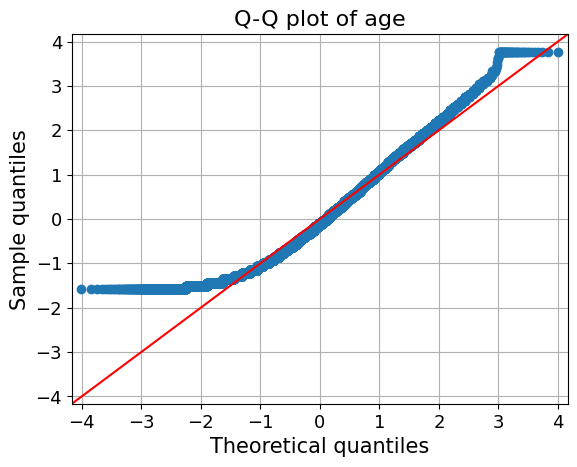

<Figure size 800x500 with 0 Axes>

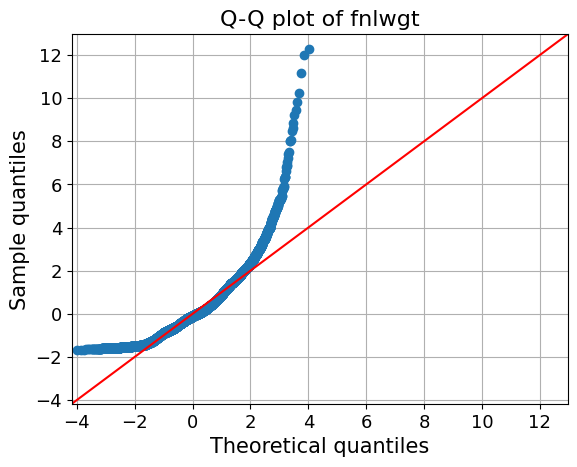

<Figure size 800x500 with 0 Axes>

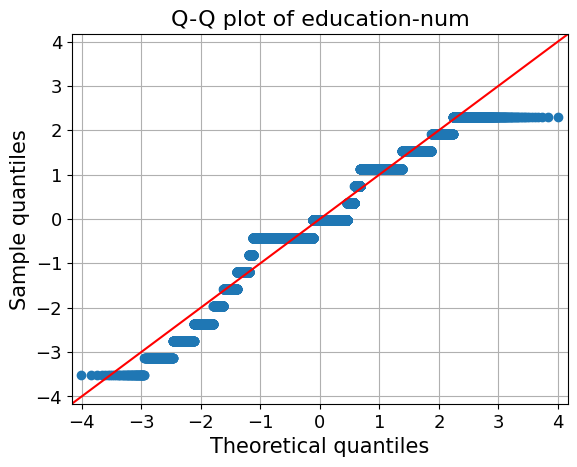

<Figure size 800x500 with 0 Axes>

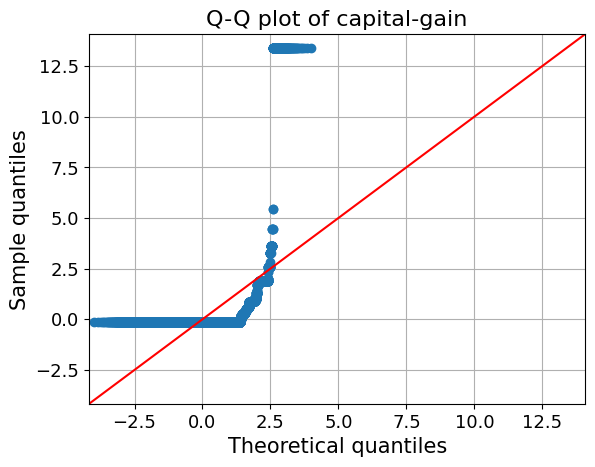

<Figure size 800x500 with 0 Axes>

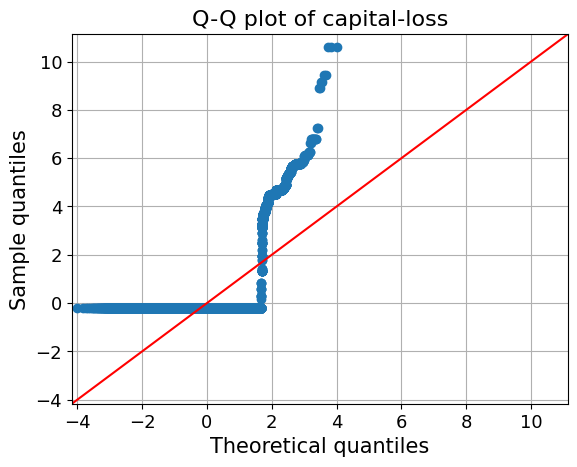

<Figure size 800x500 with 0 Axes>

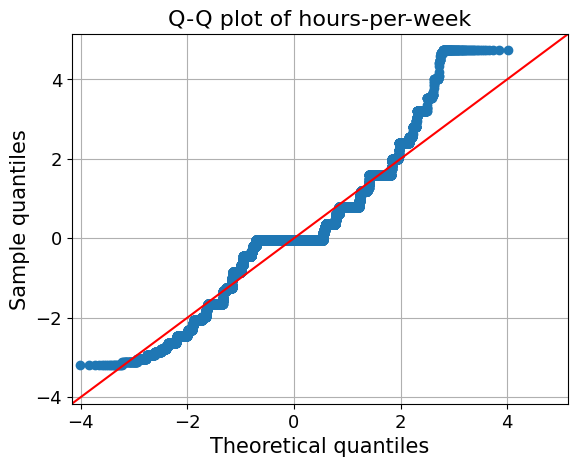

In [7]:
#2. checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot

data_norm = data[
    ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
]
for c in data_norm.columns[:]:
    plt.figure(figsize=(8, 5))
    fig = qqplot(data_norm[c], line="45", fit="True")
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.xlabel("Theoretical quantiles", fontsize=15)
    plt.ylabel("Sample quantiles", fontsize=15)
    plt.title("Q-Q plot of {}".format(c), fontsize=16)
    plt.grid(True)
    plt.show()

This code retrieves the unique values present in the 'salary' column of the DataFrame named 'data'.

In [8]:
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

The code encrypts each distinct category with an integer value by converting the categorical columns given in 'ordinal_columns' into numerical representations using the scikit-learn OrdinalEncoder. The categorical columns are transformed by the 'fit_transform' method, which first fits the encoder to the data and then replaces the original values with the encoded integers.

In [9]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_columns = ['workclass','occupation','race','sex','native-country','relationship','education','marital-status']
encoder = OrdinalEncoder(categories='auto')
data[ordinal_columns] = encoder.fit_transform(data[ordinal_columns])


This code converts the categorical values in the'salary' column of the DataFrame 'data' into numerical labels by using the scikit-learn LabelEncoder.


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['salary'] = le.fit_transform(data['salary'])

Q4 -Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [11]:
# 4. independent variables are useful to predict a target
# 1st method
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['salary'].sort_values(ascending=False)
print(correlation_with_target)

salary            1.000000
education-num     0.335154
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
sex               0.215980
capital-loss      0.150526
education         0.079317
occupation        0.075468
race              0.071846
workclass         0.051604
native-country    0.015840
fnlwgt           -0.009463
marital-status   -0.199307
relationship     -0.250918
Name: salary, dtype: float64


This code generates a heatmap visualization of the correlation matrix for the columns in the DataFrame 'data', with annotations indicating the correlation values, using a color map with shades of red, yellow, and green.

<Axes: >

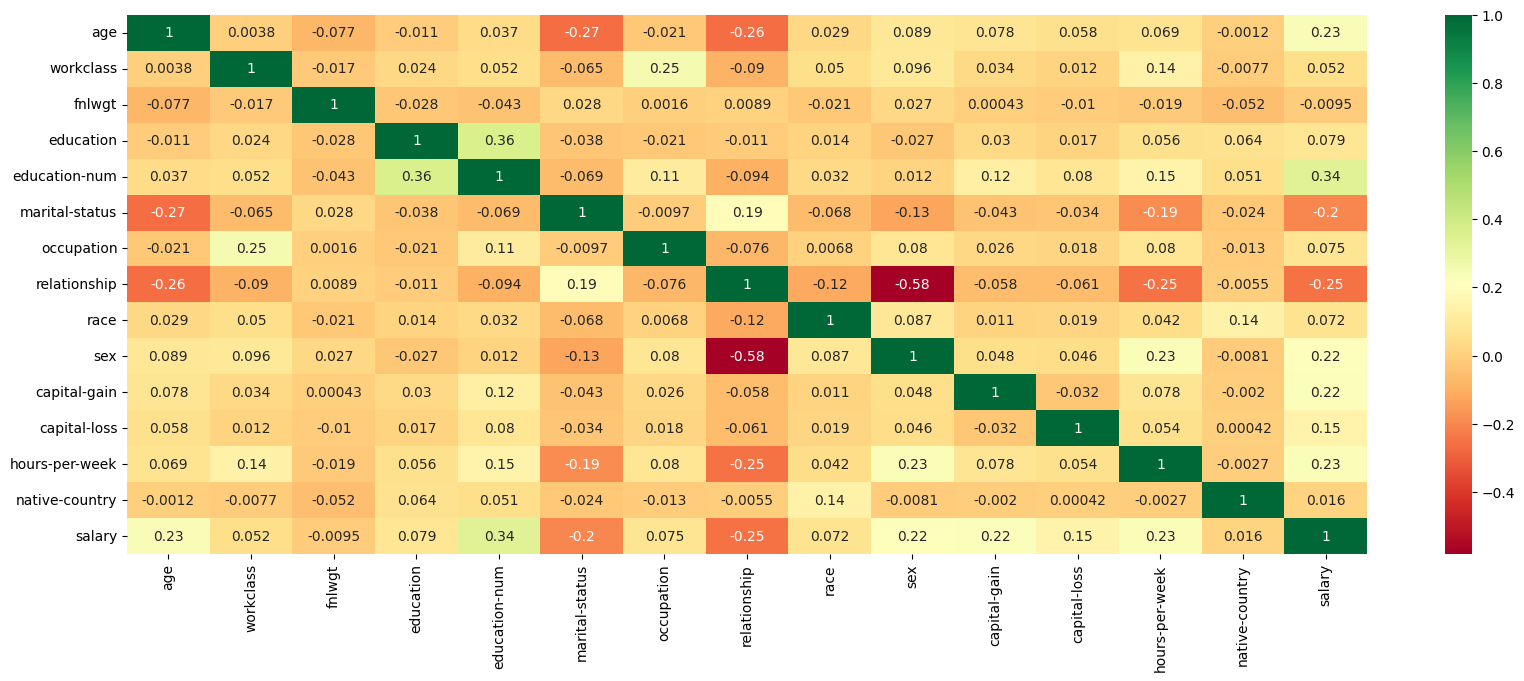

In [12]:
# the heat map of the correlation
plt.figure(figsize=(20, 7))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn")

This code creates a pair plot to visually inspect the relationships and potential collinearity between pairs of numeric variables in the DataFrame 'data'.

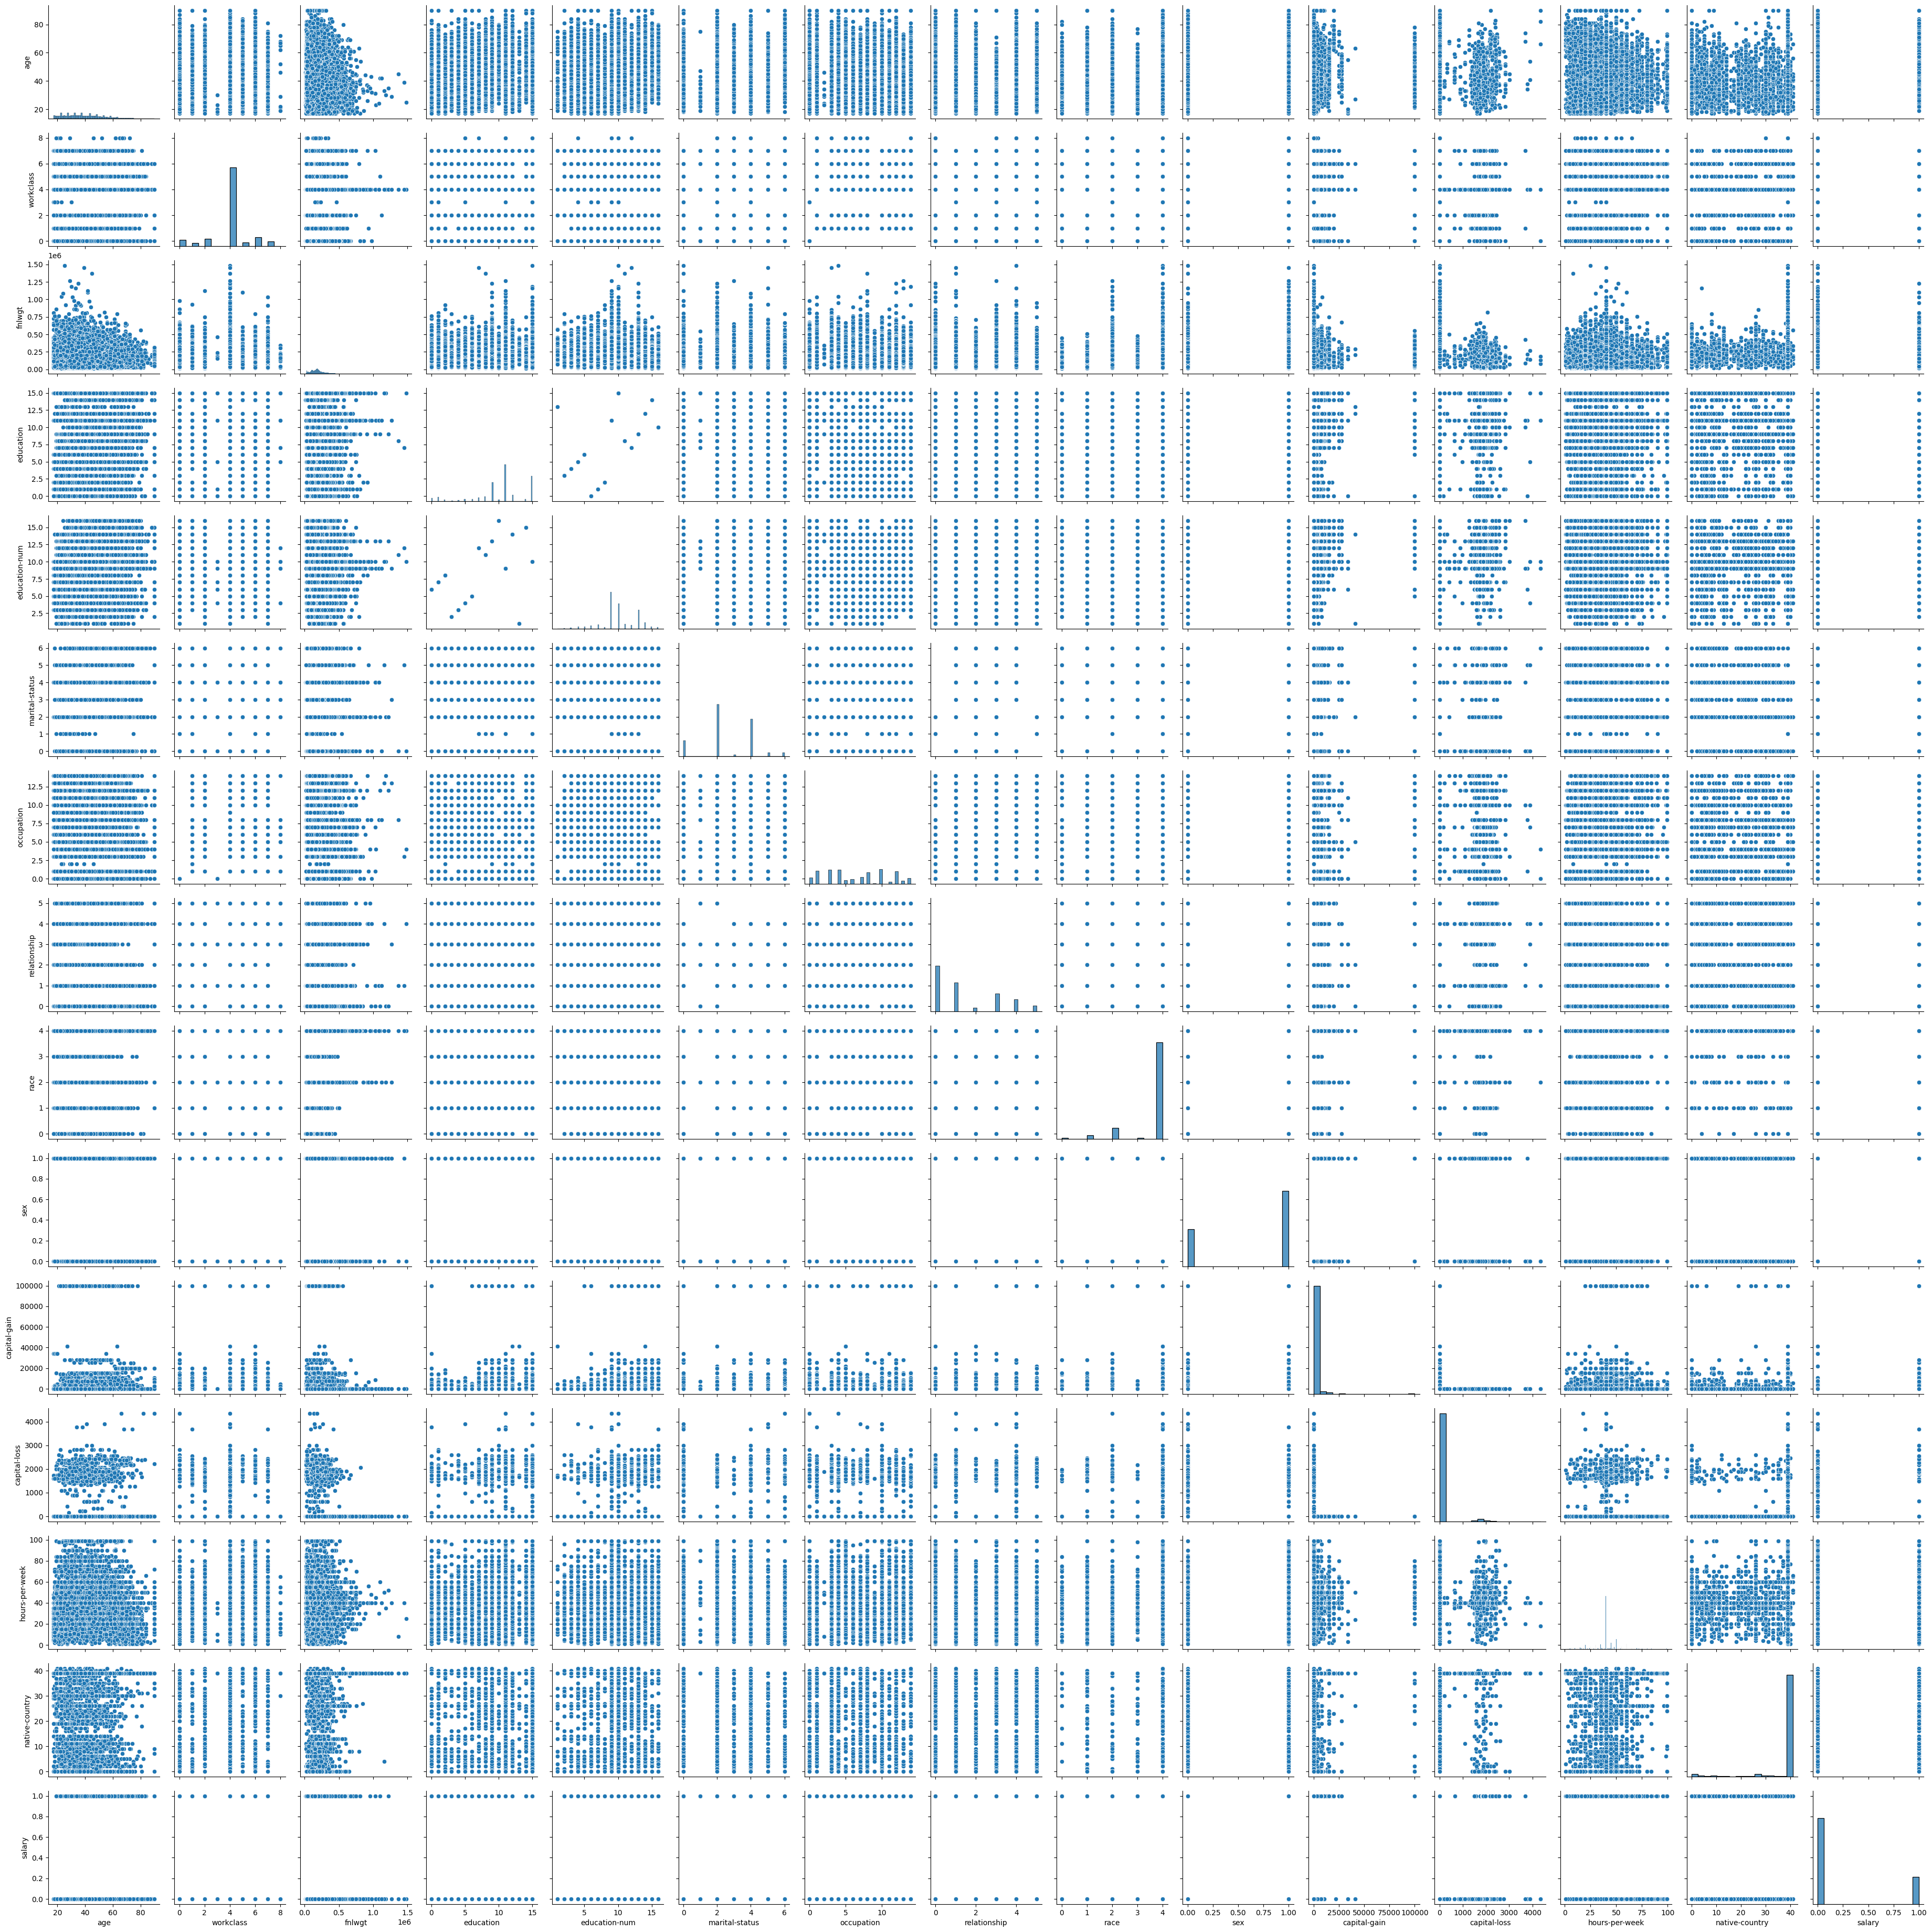

In [13]:
# pair plot to check the colinearity
sns.pairplot(data)

This code sorts the significance scores of each feature and prints them in decreasing order using a Random Forest classifier. The model is trained on the independent variables (features) 'X' and the target variable 'y'.


In [14]:
# Feature importance using Random Forest
# 2nd method
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['salary'])
y = data['salary']
model = RandomForestClassifier()
model.fit(X, y)
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance from Random Forest:")
print(feature_importance)


Feature Importance from Random Forest:
fnlwgt            0.171913
age               0.148697
capital-gain      0.114745
relationship      0.108752
education-num     0.092877
hours-per-week    0.081790
occupation        0.067657
marital-status    0.064476
workclass         0.039406
capital-loss      0.034560
education         0.032241
native-country    0.016618
race              0.013891
sex               0.012378
dtype: float64


This code ranks the features according to their important scores using univariate feature selection with ANOVA F-value. It then selects the top 5 features with the highest scores and prints them along with their corresponding scores.


In [15]:
# Feature importance using SelectKBest
# 3rd method
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
selected_features = selected_features.sort_values(by='Score', ascending=False)
print("\nUnivariate Feature Selection (ANOVA):")
print(selected_features)


Univariate Feature Selection (ANOVA):
                      Score
education-num   4120.095780
relationship    2187.645828
age             1886.707314
hours-per-week  1813.386282
capital-gain    1709.150064
sex             1593.107907
marital-status  1346.851776
capital-loss     754.830452
education        206.129509
occupation       186.500322
race             168.934788
workclass         86.936161
native-country     8.171557
fnlwgt             2.915594


Q5- Which independent variables have missing data? How much?

There are no missing values in the independent variables.

In [16]:
# 5. Independent variables with missing data and their percentage
missing_data_independent = data.drop(columns=['salary']).isnull().sum()
missing_data_percentage = (missing_data_independent / len(data)) * 100
print("Missing Data in Independent Variables:")
print(pd.DataFrame({'Missing Count': missing_data_independent, 'Percentage': missing_data_percentage}))


Missing Data in Independent Variables:
                Missing Count  Percentage
age                         0         0.0
workclass                   0         0.0
fnlwgt                      0         0.0
education                   0         0.0
education-num               0         0.0
marital-status              0         0.0
occupation                  0         0.0
relationship                0         0.0
race                        0         0.0
sex                         0         0.0
capital-gain                0         0.0
capital-loss                0         0.0
hours-per-week              0         0.0
native-country              0         0.0


Q6- * Do the training and test sets have the same data?

In [17]:
# 6. Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if training and test sets have the same data
print("Training Set:")
print(X_train.describe())
print("\nTest Set:")
print(X_test.describe())


Training Set:
                age     workclass        fnlwgt     education  education-num  \
count  26048.000000  26048.000000  2.604800e+04  26048.000000   26048.000000   
mean      38.576513      3.871314  1.897592e+05     10.287853      10.080544   
std       13.642904      1.454505  1.052329e+05      3.871331       2.575202   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.179630e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.782635e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.370065e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    26048.000000  26048.000000  26048.000000  26048.000000  26048.000000   
mean         2.612677      6.573633      1.442030      3.663544      0.668113   
std          1.502321 

This code plots histograms of the 'age' variable for both the training and test sets separately, showing the distribution of ages in each dataset.

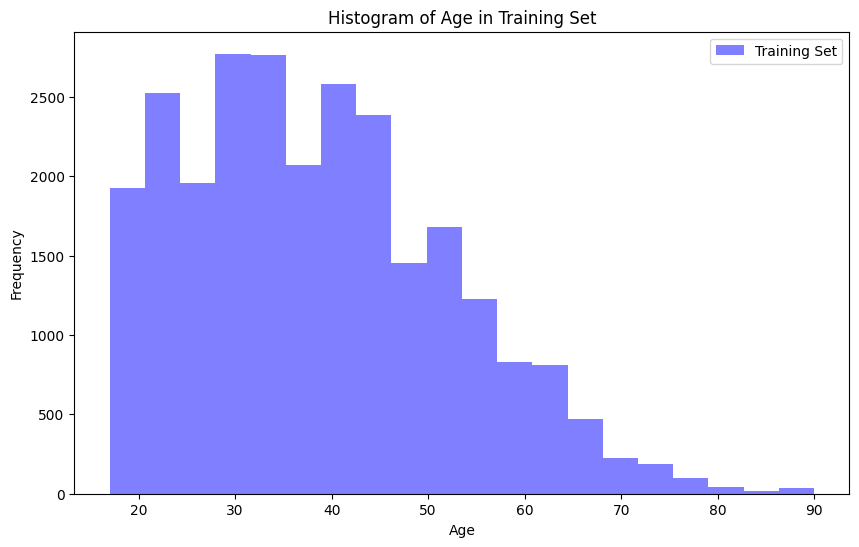

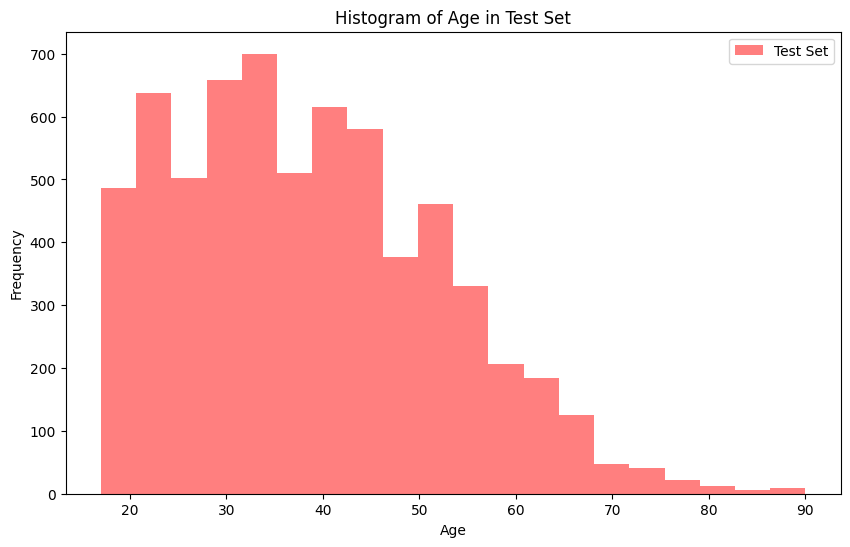

In [18]:

# Plot histogram for training set
plt.figure(figsize=(10, 6))
plt.hist(X_train['age'], bins=20, color='blue', alpha=0.5, label='Training Set')
plt.title('Histogram of Age in Training Set')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot histogram for test set
plt.figure(figsize=(10, 6))
plt.hist(X_test['age'], bins=20, color='red', alpha=0.5, label='Test Set')
plt.title('Histogram of Age in Test Set')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Q7- In the predictor variables independent of all the other predictor variables?

In [19]:
# 7. Check for multicollinearity using correlation matrix or variance inflation factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif)


Variance Inflation Factor (VIF):
          Features        VIF
0              age   8.521265
1        workclass   8.475260
2           fnlwgt   4.031573
3        education   9.210325
4    education-num  18.379729
5   marital-status   3.976179
6       occupation   3.710596
7     relationship   2.612286
8             race  17.578379
9              sex   4.441675
10    capital-gain   1.044798
11    capital-loss   1.061817
12  hours-per-week  12.147293
13  native-country  19.726726


Q8- Which predictor variables are the most important?



In [20]:
# 8. Predictor variables importance using Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("Feature Importance from Random Forest:")
print(feature_importance)


Feature Importance from Random Forest:
fnlwgt            0.168108
age               0.147437
capital-gain      0.112835
relationship      0.093303
education-num     0.091756
marital-status    0.084473
hours-per-week    0.082191
occupation        0.068674
workclass         0.040460
capital-loss      0.035498
education         0.032957
native-country    0.016734
race              0.014046
sex               0.011530
dtype: float64


 Q9- Do the ranges of the predictor variables make sense?

In [21]:
# 9. Check the ranges of predictor variables
print("Ranges of Predictor Variables:")
print(X.describe())


Ranges of Predictor Variables:
                age     workclass        fnlwgt     education  education-num  \
count  32561.000000  32561.000000  3.256100e+04  32561.000000   32561.000000   
mean      38.581647      3.868892  1.897784e+05     10.298210      10.080679   
std       13.640433      1.455960  1.055500e+05      3.870264       2.572720   
min       17.000000      0.000000  1.228500e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.178270e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.783560e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.370510e+05     12.000000      12.000000   
max       90.000000      8.000000  1.484705e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    32561.000000  32561.000000  32561.000000  32561.000000  32561.000000   
mean         2.611836      6.572740      1.446362      3.665858      0.669205   
std  

Q10- What are the distributions of the predictor variables?

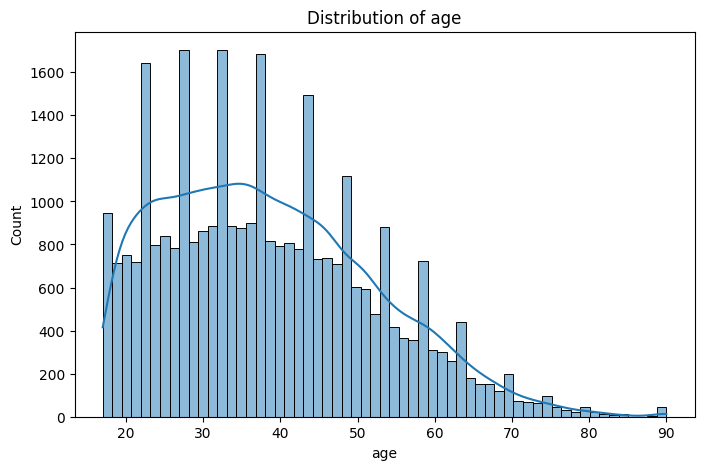

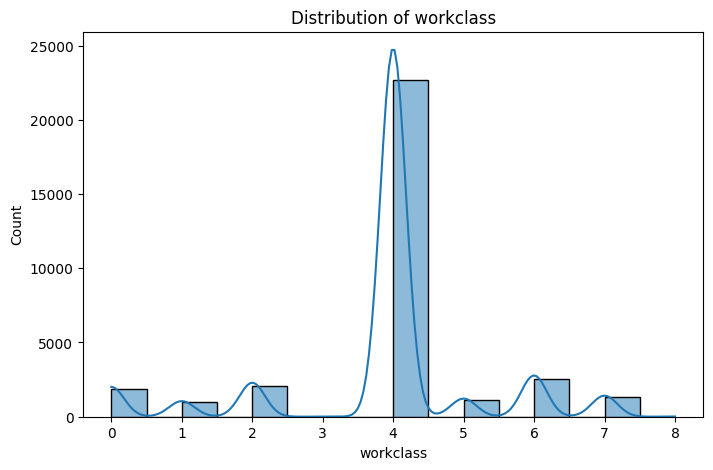

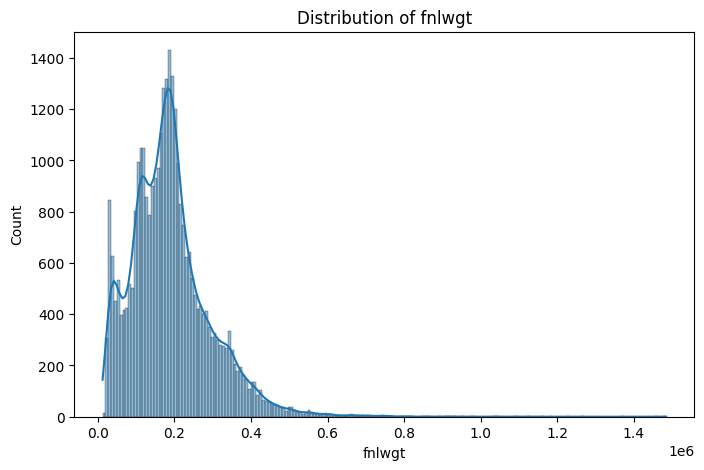

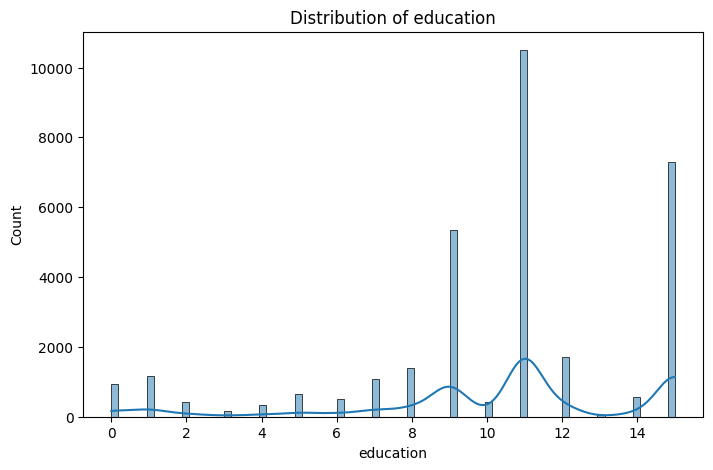

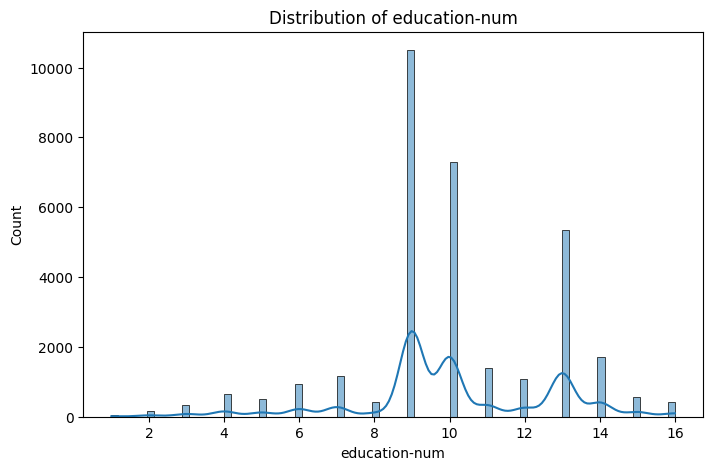

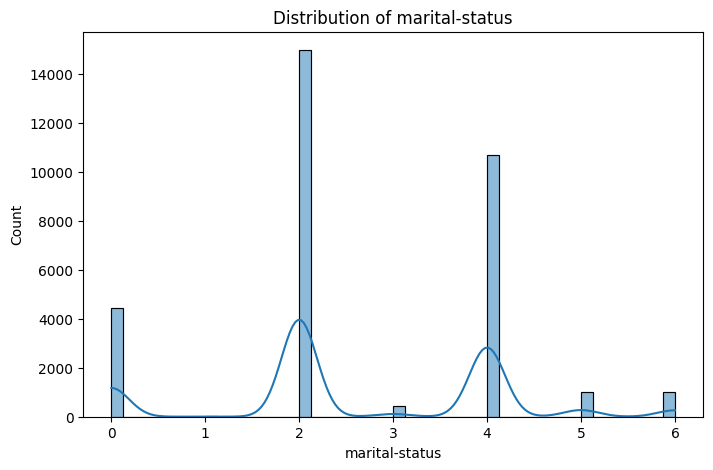

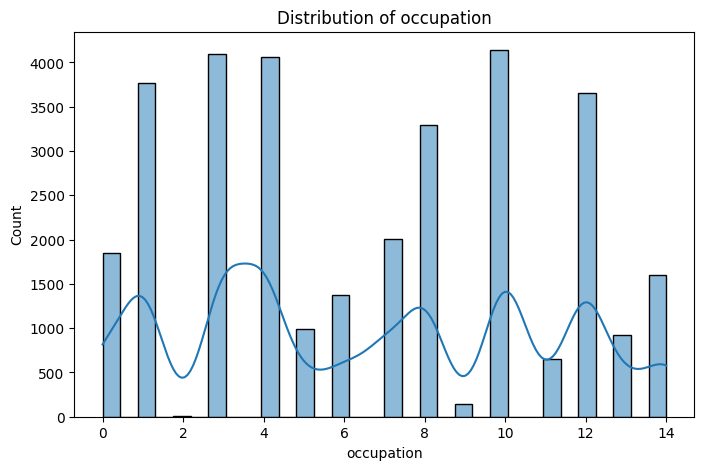

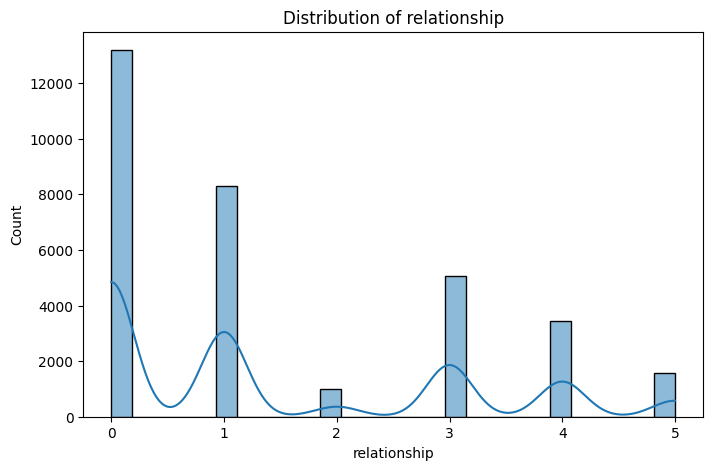

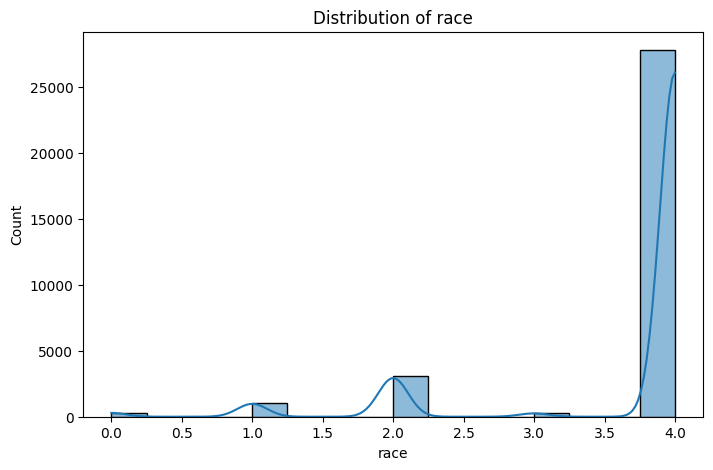

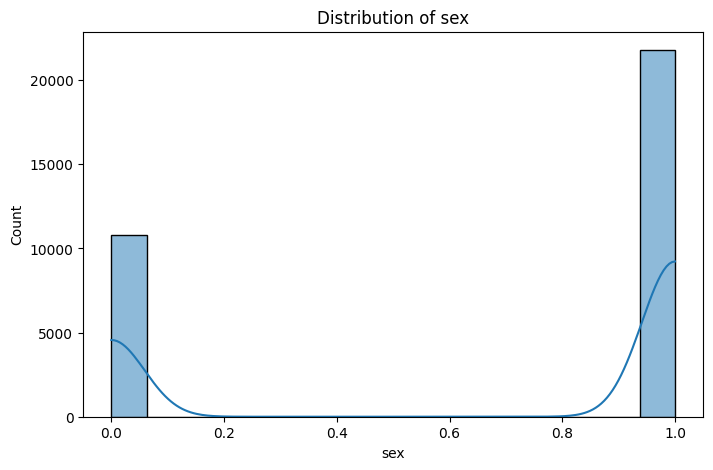

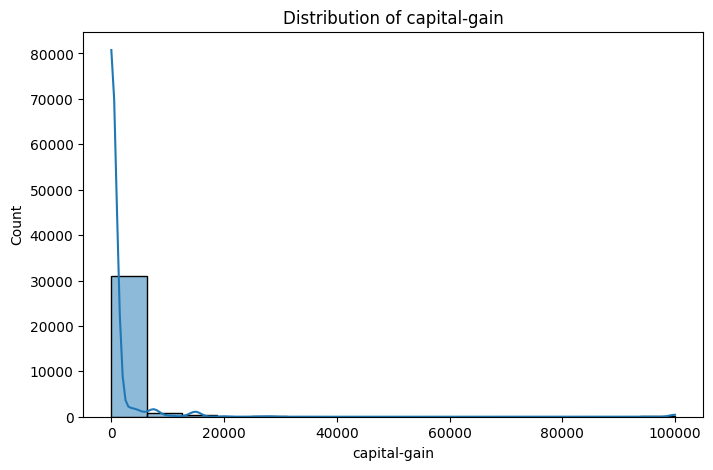

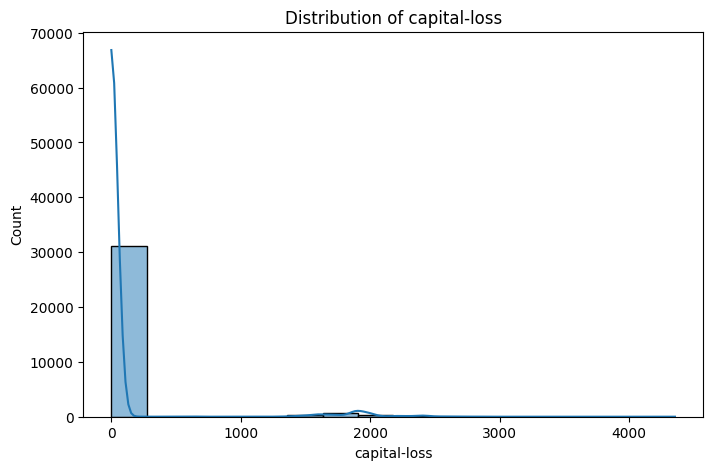

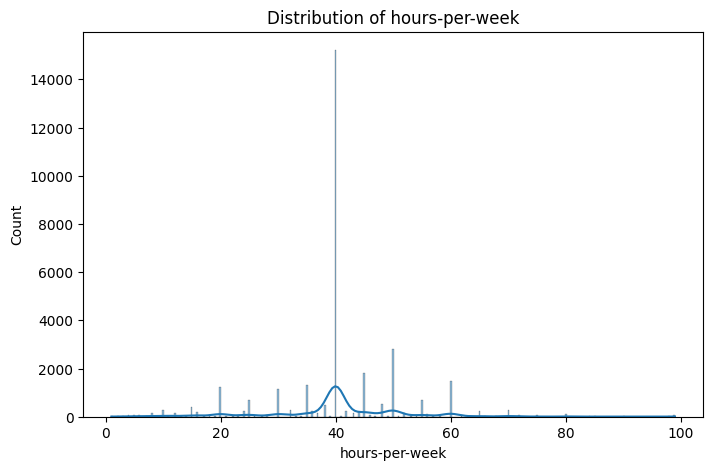

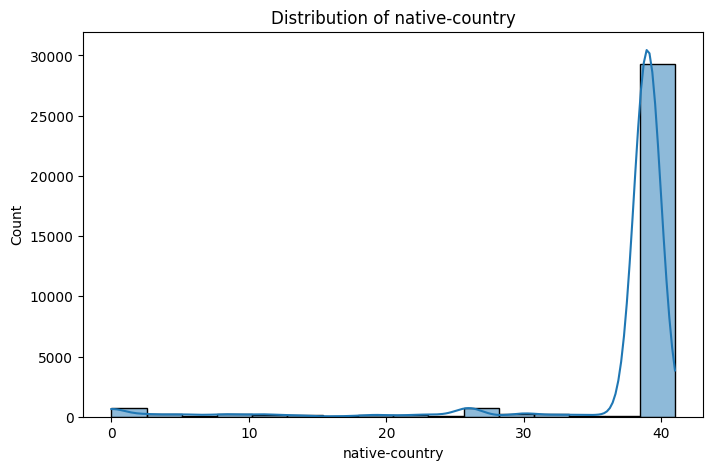

In [22]:
# 10. Plot distributions of predictor variables
for column in X.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()


Q11- Remove outliers and keep outliers (does if have an effect of the final predictive model)?

In [23]:
# 11. Example: Remove outliers in 'age' using z-score and create a new DataFrame with outliers removed
from scipy import stats

z_scores = stats.zscore(data['age'])
outliers = data[(z_scores < -3) | (z_scores > 3)]
data_no_outliers = data[(z_scores > -3) & (z_scores < 3)]

# Alternatively, if you want to keep outliers:
data_with_outliers = data.copy()  # Create a copy of the original DataFrame
data_with_outliers['is_outlier'] = (z_scores < -3) | (z_scores > 3)


Q12- Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define a function to evaluate imputation performance
def evaluate_imputation(original_data, imputed_data):
    mae = mean_absolute_error(original_data, imputed_data)
    rmse = mean_squared_error(original_data, imputed_data, squared=False)
    return mae, rmse

# Randomly remove 1%, 5%, and 10% of the data
for percentage in [0.01, 0.05, 0.1]:
    num_missing = int(len(data) * percentage)
    data_sampled = data.drop(index=data.sample(num_missing).index)

    # Impute missing values using different methods
    imputer_mean = SimpleImputer(strategy='mean')
    imputer_median = SimpleImputer(strategy='median')
    imputer_most_frequent = SimpleImputer(strategy='most_frequent')

    data_mean = pd.DataFrame(imputer_mean.fit_transform(data_sampled), columns=data_sampled.columns)
    data_median = pd.DataFrame(imputer_median.fit_transform(data_sampled), columns=data_sampled.columns)
    data_most_frequent = pd.DataFrame(imputer_most_frequent.fit_transform(data_sampled), columns=data_sampled.columns)

    # Evaluate the performance of each imputation method
    original_data = data.iloc[data_sampled.index]  # Get the original data corresponding to the removed samples
    mae_mean, rmse_mean = evaluate_imputation(original_data, data_mean)
    mae_median, rmse_median = evaluate_imputation(original_data, data_median)
    mae_most_frequent, rmse_most_frequent = evaluate_imputation(original_data, data_most_frequent)

    # Print evaluation metrics
    print(f"Percentage of missing data: {percentage * 100}%")
    print("Mean Imputation:")
    print(f"MAE: {mae_mean}, RMSE: {rmse_mean}")
    print("Median Imputation:")
    print(f"MAE: {mae_median}, RMSE: {rmse_median}")
    print("Most Frequent Imputation:")
    print(f"MAE: {mae_most_frequent}, RMSE: {rmse_most_frequent}")


Percentage of missing data: 1.0%
Mean Imputation:
MAE: 0.0, RMSE: 0.0
Median Imputation:
MAE: 0.0, RMSE: 0.0
Most Frequent Imputation:
MAE: 0.0, RMSE: 0.0
Percentage of missing data: 5.0%
Mean Imputation:
MAE: 0.0, RMSE: 0.0
Median Imputation:
MAE: 0.0, RMSE: 0.0
Most Frequent Imputation:
MAE: 0.0, RMSE: 0.0
Percentage of missing data: 10.0%
Mean Imputation:
MAE: 0.0, RMSE: 0.0
Median Imputation:
MAE: 0.0, RMSE: 0.0
Most Frequent Imputation:
MAE: 0.0, RMSE: 0.0


Q13- For categorical data, calculate the accuracy and a confusion matrix.

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Example: Calculate accuracy and confusion matrix for 'workclass'
predicted_values = model.predict(X_test)  # Assuming 'model' is your trained model and X_test is your test data

accuracy = accuracy_score(y_test, predicted_values)  # Assuming 'y_test' is the true labels for the test set
conf_matrix = confusion_matrix(y_test, predicted_values)  # Assuming 'y_test' is the true labels for the test set

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8588975894365116
Confusion Matrix:
[[4593  349]
 [ 570 1001]]


MIT License

Copyright (c) 2024 thoratmansi

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.